# 项目案例：电影数据分析案例

</br>

## 项目简介

本案例来源于kaggle上的TMDB 5000 Movie Dataset数据集，为了探讨电影数据可视化，为电影的制作提供数据支持



**提出问题**

* 电影类型如何随着时间的推移发生变化
* 电影类型与利润的关系
* 两家影视公司的对比情况如何
* 改编电影和原创电影的发行对比情况
* 电影市场与电影票房与评分的关系
* 分析电影关键字

In [1]:
import json
import pandas as pd
import numpy as np 
from pandas import Series,DataFrame
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns             # 使用Seaborn库

from matplotlib import font_manager
my_font = font_manager.FontProperties(fname= r'C:\Windows\Fonts\FZYTK.TTF')

# from wordcloud import Wordcloud,STOPWORDS,ImageColorGenerator  # 导入词云包
from scipy.misc import imread
get_ipython().magic('matplotlib inline')

def remove_border(axes = None,top=False,right = False,left = True, bottom = True):
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)

In [3]:
credits=pd.read_csv("tmdb_5000_credits.csv")
movies=pd.read_csv("tmdb_5000_movies.csv")
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [4]:
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [5]:
fulldf=pd.concat([credits,movies],axis=1)
fulldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
movie_id                4803 non-null int64
title                   4803 non-null object
cast                    4803 non-null object
crew                    4803 non-null object
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null ob

In [6]:
moviesdf = fulldf[['original_title','crew','release_date','genres','keywords','production_companies',
       'production_countries','revenue','budget','runtime','vote_average']]
moviesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 11 columns):
original_title          4803 non-null object
crew                    4803 non-null object
release_date            4802 non-null object
genres                  4803 non-null object
keywords                4803 non-null object
production_companies    4803 non-null object
production_countries    4803 non-null object
revenue                 4803 non-null int64
budget                  4803 non-null int64
runtime                 4801 non-null float64
vote_average            4803 non-null float64
dtypes: float64(2), int64(2), object(7)
memory usage: 412.8+ KB


下面是moviedf数据集中部分字段的含义介绍：


* id：标识号

* imdb id:IMDB标识号

* popularity：在Movie Database上的相对页面查看次数

* budget：预算（美元）

* revenue：收入（美元）

* original_title：电影名称

* cast：演员列表，按|分隔，最多5名演员

* homepage：电影首页的URL

* director：导演列表，按|分隔，最多5名导演

* tagline：电影的标语

* keywords：与电影相关的关键字，按|分隔，最多5个关键字

* overview：剧情摘要

* runtime：电影时长

* genres：风格列表，按|分隔，最多5种风格

* production_companies：制作公司列表，按|分隔，最多5家公司

* release_date：首次上映日期

* vote_count：评分次数

* vote_average：平均评分·release year：发行年份

In [7]:
moviesdf['profit'] = moviesdf['revenue']-moviesdf['budget']
moviesdf.head(2)

,original_title,crew,release_date,genres,keywords,production_companies,production_countries,revenue,budget,runtime,vote_average,profit
0,Avatar,"[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2009-12-10,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2787965087,237000000,162.0,7.2,2550965087
1,Pirates of the Caribbean: At World's End,"[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",2007-05-19,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",961000000,300000000,169.0,6.9,661000000


In [8]:
release_date_null = moviesdf['release_date'].isnull()
moviesdf.loc[release_date_null,:]

,original_title,crew,release_date,genres,keywords,production_companies,production_countries,revenue,budget,runtime,vote_average,profit
4553,America Is Still the Place,[],NaN,[],[],[],[],0,0,0.0,0.0,0


In [9]:
moviesdf['release_date'] = movies['release_date'].fillna('2014-06-01')
moviesdf.loc[release_date_null,:]
# moviesdf.loc[4553,:]

,original_title,crew,release_date,genres,keywords,production_companies,production_countries,revenue,budget,runtime,vote_average,profit
4553,America Is Still the Place,[],2014-06-01,[],[],[],[],0,0,0.0,0.0,0


In [10]:
moviesdf['release_date'] = pd.to_datetime(moviesdf['release_date'],format='%Y-%m-%d')
moviesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 12 columns):
original_title          4803 non-null object
crew                    4803 non-null object
release_date            4803 non-null datetime64[ns]
genres                  4803 non-null object
keywords                4803 non-null object
production_companies    4803 non-null object
production_countries    4803 non-null object
revenue                 4803 non-null int64
budget                  4803 non-null int64
runtime                 4801 non-null float64
vote_average            4803 non-null float64
profit                  4803 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 450.4+ KB


In [11]:
runtime_null = moviesdf['runtime'].isnull()
moviesdf.loc[runtime_null,:]

,original_title,crew,release_date,genres,keywords,production_companies,production_countries,revenue,budget,runtime,vote_average,profit
2656,Chiamatemi Francesco - Il Papa della gente,"[{""credit_id"": ""5660019ac3a36875f100252b"", ""de...",2015-12-03,"[{""id"": 18, ""name"": ""Drama""}]","[{""id"": 717, ""name"": ""pope""}, {""id"": 5565, ""na...","[{""name"": ""Taodue Film"", ""id"": 45724}]","[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}]",0,15000000,NaN,7.3,-15000000
4140,"To Be Frank, Sinatra at 100","[{""credit_id"": ""592b25e4c3a368783e065a2f"", ""de...",2015-12-12,"[{""id"": 99, ""name"": ""Documentary""}]","[{""id"": 6027, ""name"": ""music""}, {""id"": 225822,...","[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",0,2,NaN,0.0,-2


In [12]:
values1 = {"runtime":98.0}
values2 = {"runtime":80.0}
moviesdf.fillna(value=values1,inplace=True,limit=1)
moviesdf.fillna(value=values2,inplace=True,limit=1)
moviesdf.loc[runtime_null,:]

,original_title,crew,release_date,genres,keywords,production_companies,production_countries,revenue,budget,runtime,vote_average,profit
2656,Chiamatemi Francesco - Il Papa della gente,"[{""credit_id"": ""5660019ac3a36875f100252b"", ""de...",2015-12-03,"[{""id"": 18, ""name"": ""Drama""}]","[{""id"": 717, ""name"": ""pope""}, {""id"": 5565, ""na...","[{""name"": ""Taodue Film"", ""id"": 45724}]","[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}]",0,15000000,98.0,7.3,-15000000
4140,"To Be Frank, Sinatra at 100","[{""credit_id"": ""592b25e4c3a368783e065a2f"", ""de...",2015-12-12,"[{""id"": 99, ""name"": ""Documentary""}]","[{""id"": 6027, ""name"": ""music""}, {""id"": 225822,...","[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",0,2,80.0,0.0,-2


In [13]:
moviesdf['genres'] = moviesdf['genres'].apply(json.loads)
def decode(column):
    z = []
    for i in column:
        z.append(i['name'])
    return '|'.join(z)
moviesdf['genres'] = moviesdf['genres'].apply(decode)

moviesdf.head(2)

,original_title,crew,release_date,genres,keywords,production_companies,production_countries,revenue,budget,runtime,vote_average,profit
0,Avatar,"[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2009-12-10,Action|Adventure|Fantasy|Science Fiction,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2787965087,237000000,162.0,7.2,2550965087
1,Pirates of the Caribbean: At World's End,"[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",2007-05-19,Adventure|Fantasy|Action,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",961000000,300000000,169.0,6.9,661000000



geners=set()
for m in moviesdf.genres: geners.update(g for g in m.split("|"))
    
geners.remove("")
geners= sorted(geners)
geners

for gener in geners: 
    moviesdf[gener] = [gener in movie.split("|") for movie in moviesdf.genres]
moviesdf.head(2)

genre_df = moviesdf.loc[:,geners]
genre_df.head(2)

In [14]:
genres_list =set()
for i in moviesdf['genres'].str.split("|"):
    genres_list = set().union(i,genres_list)
    genres_list = list(genres_list)
    genres_list
genres_list

['',
 'Thriller',
 'TV Movie',
 'Animation',
 'Action',
 'Mystery',
 'Foreign',
 'Adventure',
 'Romance',
 'Drama',
 'Science Fiction',
 'Family',
 'Fantasy',
 'Documentary',
 'War',
 'Crime',
 'Horror',
 'History',
 'Comedy',
 'Western',
 'Music']

In [15]:
genres_list.remove('')
genres_list

['Thriller',
 'TV Movie',
 'Animation',
 'Action',
 'Mystery',
 'Foreign',
 'Adventure',
 'Romance',
 'Drama',
 'Science Fiction',
 'Family',
 'Fantasy',
 'Documentary',
 'War',
 'Crime',
 'Horror',
 'History',
 'Comedy',
 'Western',
 'Music']

In [16]:
genres_list.sort()
genres_list

['Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western']

In [17]:
for genre in genres_list:
    moviesdf[genre] = moviesdf['genres'].str.contains(genre).apply(lambda x:1 if x else 0)


In [18]:
genre_year = moviesdf.loc[:,genres_list]
genre_year.head(2)

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


 ##  求各年份各电影类型的数量
1. release_date提取年份数据为year,且覆盖原数据
2. year数据为1916年~2017年
3. 通过groupby分类聚合各年份各类型电影数量

In [19]:
moviesdf['release_date'] = pd.to_datetime(moviesdf['release_date']).dt.year
columns = {'release_date':'year'}
moviesdf.rename(columns=columns,inplace=True)
moviesdf['year'].apply(int).head()

0    2009
1    2007
2    2015
3    2012
4    2012
Name: year, dtype: int64

In [20]:
min(moviesdf['year']),max(moviesdf['year'])

(1916, 2017)

In [21]:
genre_year.index =  moviesdf['year']
genredf = genre_year.groupby('year').sum()
genredf.tail(5)

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
year,,,,,,,,,,,,,,,,,,,,
2013,56,36,17,71,37,10,110,22,21,0,8,25,12,5,25,27,2,53,3,1
2014,54,37,14,62,27,7,110,23,16,0,7,21,9,15,24,26,0,66,10,3
2015,46,35,13,52,26,7,95,17,10,0,9,33,8,20,23,28,0,67,2,7
2016,39,23,4,26,10,0,37,9,13,0,6,20,1,6,9,11,0,27,3,1
2017,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
genredf_sum = genredf.sum(axis=0).sort_values(ascending=False)
genredf_sum.head()

Drama       2297
Comedy      1722
Thriller    1274
Action      1154
Romance      894
dtype: int64

## 绘制柱状图--数据可视化 

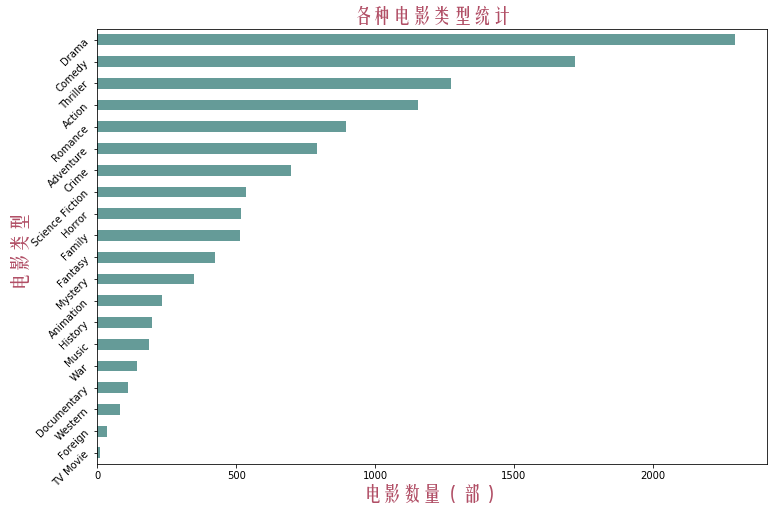

In [23]:

fig = plt.figure(figsize=(12,8))
# axl = plt.subplot(111)
genredf_sum.sort_values(ascending=True).plot(kind='barh',label ='genres',color='#659B98')
plt.title("各种电影类型统计",fontproperties=my_font,fontsize =20,color='#B14F66')
plt.xlabel("电影数量（部）",fontproperties=my_font, fontsize =20,color='#B14F66')
plt.ylabel("电影类型",fontproperties=my_font,fontsize =20,color='#B14F66')
plt.yticks(rotation=45)

plt.show()

Text(0.5, 1.0, '各种电影类型所占的比例')

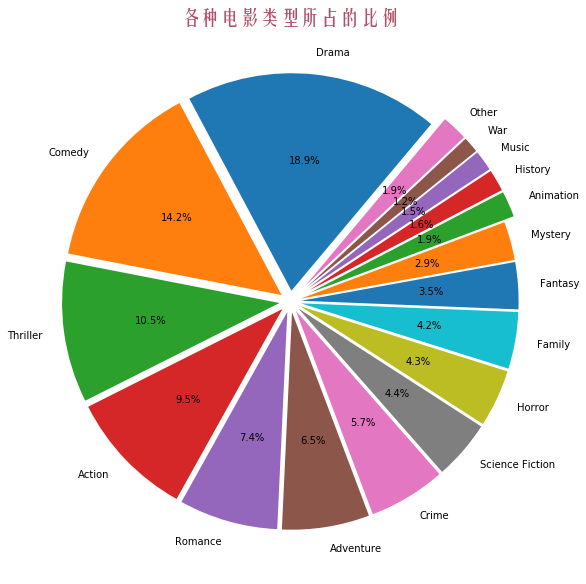

In [24]:
genres_pie = genredf_sum/genredf_sum.sum()

others =0.01
genres_pie_otr = genres_pie[genres_pie>= others]
genres_pie_otr['Other'] = genres_pie[genres_pie< others].sum()  # 小于某个值就归类汇总

explode = (genres_pie_otr <= 0.02)/20 +0.05
genres_pie_otr.plot(kind ='pie',label ='',startangle =50,shadow =False,figsize =(10,10),autopct = '%1.1f%%',explode=explode)
plt.title('各种电影类型所占的比例',fontproperties=my_font,fontsize =20,color='#B14F66')

In [25]:
und_others = genres_pie[genres_pie< others]
# aa = und_others.count()
# print(und_others.count(),und_others.sum()*100)
print("影片总计{}种类型比重小于1%,加总后的占比{:.2f}%".format(und_others.count(),und_others.sum()*100))

影片总计4种类型比重小于1%,加总后的占比1.92%


**分析结论：**


* 从上面的结果可以看出，在所有的电影类型中，Drama(戏剧)类型电影最多，占所有电影类型的18.9%，其次为Comedy(喜剧)，占所有电影类型的14.2%。

* 在所有电影类型中，电影数量排名前5的电影类型分别为：Drama(戏剧)、Comedy(喜剧)、Thriller(惊悚)、Action（动作）、Romance（冒险）。

In [26]:
genredf['year_sum'] = genredf.apply(lambda x: x.sum(), axis=1)
genredf.loc['movietype_sum'] = genredf.apply(lambda x: x.sum(), axis=0)
genredf.tail()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,year_sum
year,,,,,,,,,,,,,,,,,,,,,
2014,54,37,14,62,27,7,110,23,16,0,...,21,9,15,24,26,0,66,10,3,531
2015,46,35,13,52,26,7,95,17,10,0,...,33,8,20,23,28,0,67,2,7,498
2016,39,23,4,26,10,0,37,9,13,0,...,20,1,6,9,11,0,27,3,1,245
2017,0,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,3
movietype_sum,1154,790,234,1722,696,110,2297,513,424,34,...,519,185,348,894,535,8,1274,144,82,12160


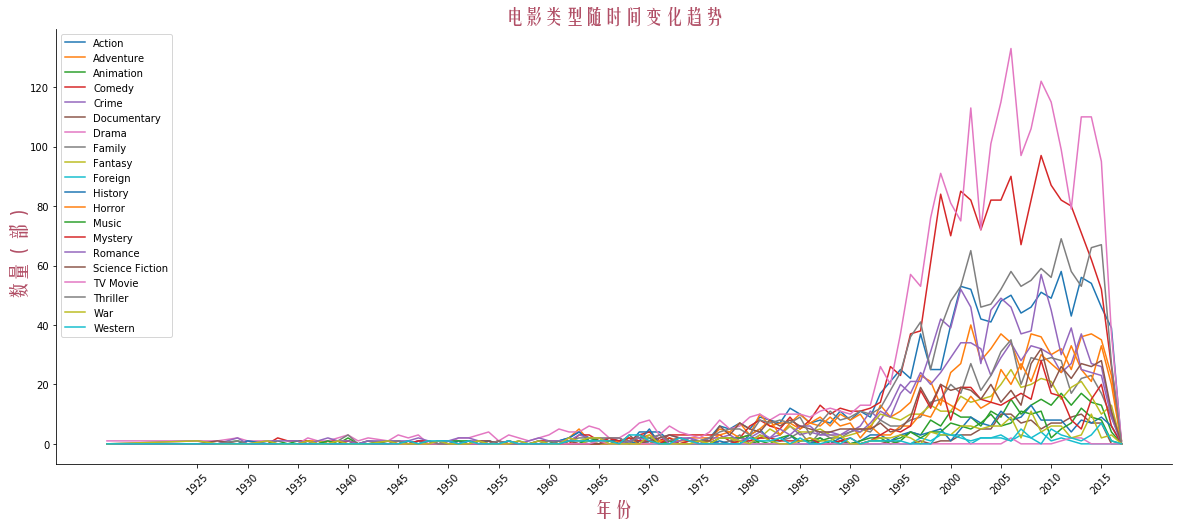

In [27]:
plt.figure(figsize=(20,8))

plt.plot(genredf.ix[:-1,:-1],label = genredf.columns[:-1])
plt.xticks(range(1925,2020,5))
plt.legend(genredf)
plt.title("电影类型随时间变化趋势",fontproperties=my_font,fontsize =20,color='#B14F66')
plt.xlabel("年份",fontproperties=my_font, fontsize =20,color='#B14F66')
plt.xticks(rotation=45)
plt.ylabel("数量（部）",fontproperties=my_font,fontsize =20,color='#B14F66')
plt.grid(False)
# plt.show()
remove_border()

In [28]:
genredf.year_sum[:-1,].describe()

count     90.000000
mean     135.111111
std      200.555209
min        1.000000
25%        6.250000
50%       23.000000
75%      147.000000
max      641.000000
Name: year_sum, dtype: float64

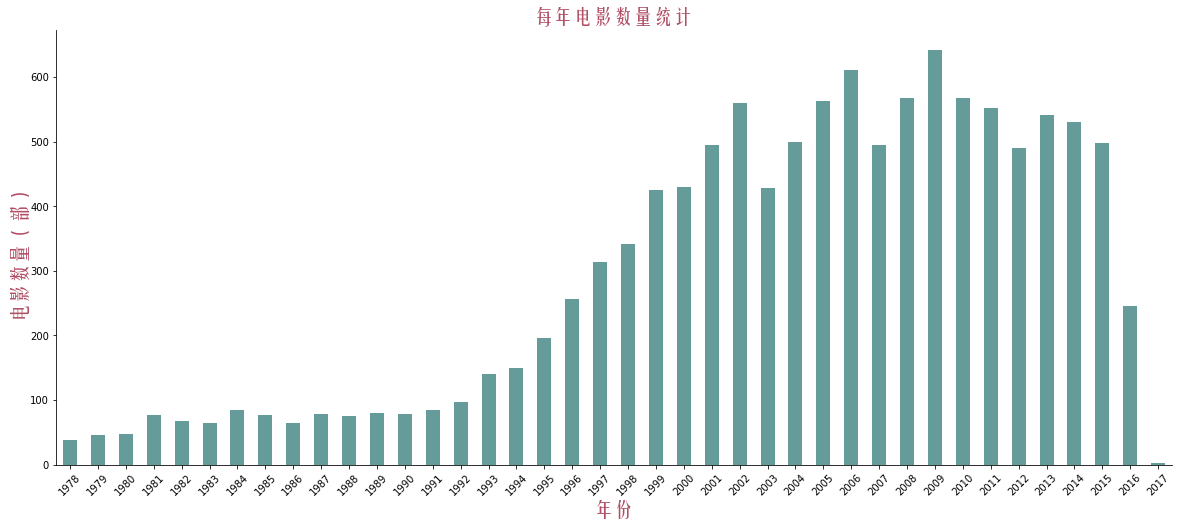

In [29]:

fig = plt.figure(figsize=(20,8))
# axl = plt.subplot(111)
genredf.year_sum[50:-1,].plot(kind='bar',color='#659B98')
plt.title("每年电影数量统计",fontproperties=my_font,fontsize =20,color='#B14F66')
plt.xlabel("年份",fontproperties=my_font, fontsize =20,color='#B14F66')
plt.xticks(rotation=45)
plt.ylabel("电影数量（部）",fontproperties=my_font,fontsize =20,color='#B14F66')
# plt.show()
remove_border()

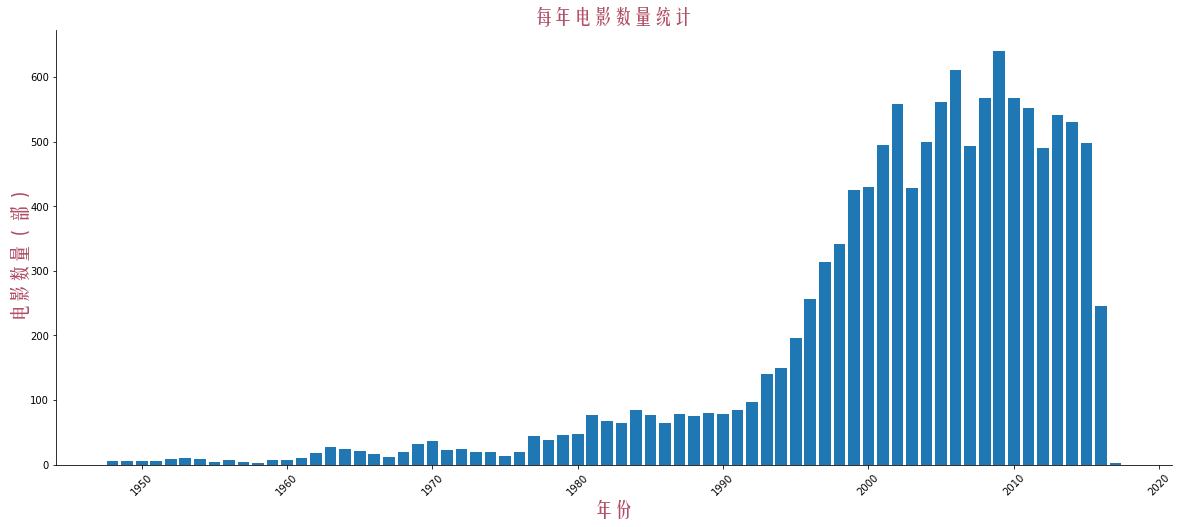

In [30]:
fig = plt.figure(figsize=(20,8))
# axl = plt.subplot(111)
plt.bar(genredf.index[20:-1],genredf.year_sum[20:-1,])
plt.title("每年电影数量统计",fontproperties=my_font,fontsize =20,color='#B14F66')
plt.xlabel("年份",fontproperties=my_font, fontsize =20,color='#B14F66')
plt.xticks(rotation=45)
plt.ylabel("电影数量（部）",fontproperties=my_font,fontsize =20,color='#B14F66')
# plt.show()
remove_border()